In [73]:
#importing all the required Modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
data=pd.read_csv("C:/Users/HP/Desktop/Analytics vidhya/Dataset/nyc_taxi_trip_duration.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [38]:
data.shape

(729322, 11)

In [39]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [40]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [41]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])
data['store_and_fwd_flag']=data['store_and_fwd_flag'].astype('category')

In [42]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [43]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()


In [44]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday


In [45]:
data['pickup_day']=data['pickup_day'].astype('category')
data['dropoff_day']=data['dropoff_day'].astype('category')
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
pickup_day                  category
dropoff_day                 category
dtype: object

# Univariate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

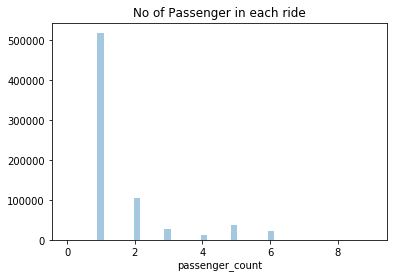

In [46]:
#Passenger Count

sns.distplot(data['passenger_count'],kde=False)
plt.title('No of Passenger in each ride')
plt.show

### Mostly we can see that in each ride 1 passenger is present  

In [47]:
a=data['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64


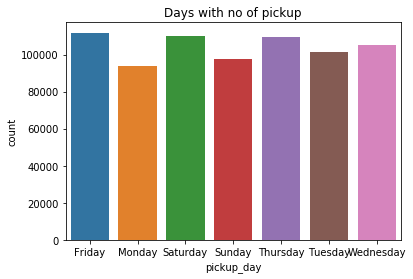

In [48]:
print(a)
sns.countplot(x='pickup_day',data=data)
plt.title('Days with no of pickup')
plt.show()

### The most no of pickup is scheduled on Friday and Saturday

In [49]:
 b=data['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64


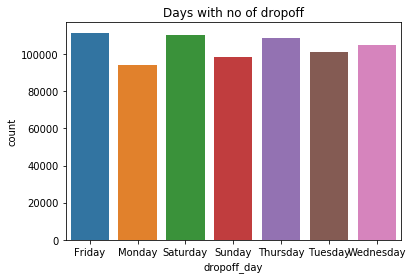

In [50]:
print(b)
sns.countplot(x='dropoff_day',data=data)
plt.title('Days with no of dropoff')
plt.show()

### The most no of dropoff is on Friday and Saturday
#### Hence we can say that Friday and Saturday is the busiest day amongst all day.

In [51]:
#Dividing Time in Diffrent Phases Of Days
def timings(x):
    if x>=datetime.time(5,0,1) and x<=datetime.time(12,0,0):
        return 'Morning'
    elif x>=datetime.time(12,0,1) and x<=datetime.time(17,0,0):
        return 'Afternoon'
    elif x>=datetime.time(17,0,1) and x<=datetime.time(21,0,0):
        return 'Evening'
    else :
        return 'Night'
data['pickup_time']=data['pickup_datetime'].apply(lambda x :timings(datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))
data['dropoff_time']=data['pickup_datetime'].apply(lambda x :timings(datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))

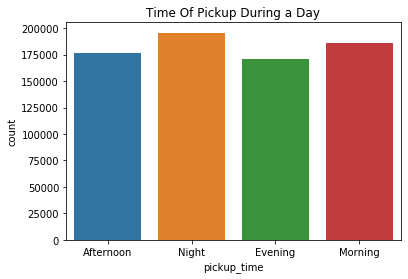

In [52]:

sns.countplot(x='pickup_time',data=data)
plt.title("Time Of Pickup During a Day")
plt.show()

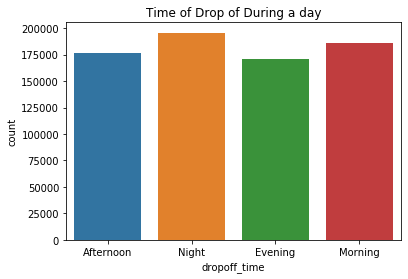

In [53]:
sns.countplot(x='dropoff_time',data=data)
plt.title('Time of Drop of During a day')
plt.show()

#### At night Most no of pickup and dropoff takes place
#### Night time is busiest followed by Morning 

In [54]:
# defining pickup hour and dropoff hour
data['pickup_hr']=data['pickup_datetime'].dt.hour
data['dropoff_hr']=data['dropoff_datetime'].dt.hour


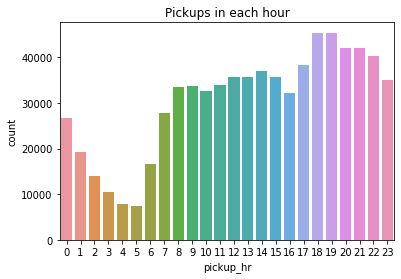

In [55]:
sns.countplot(data['pickup_hr'])
plt.title('Pickups in each hour')
plt.show()

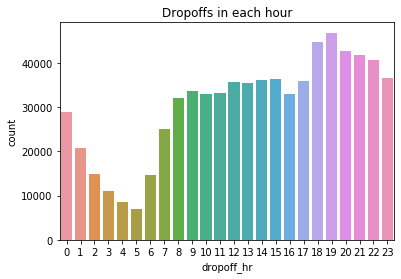

In [56]:
sns.countplot(data['dropoff_hr'])
plt.title('Dropoffs in each hour')
plt.show()

#### From above plotting of  hourly pickup and dropoff we can infer that time between 5 pm and 10 pm is most busiest time during a day 

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64


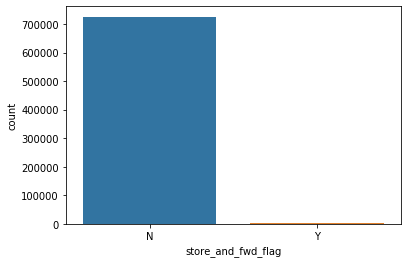

In [57]:
c=data['store_and_fwd_flag'].value_counts()
print(c)
sns.countplot(data['store_and_fwd_flag'])
plt.show()

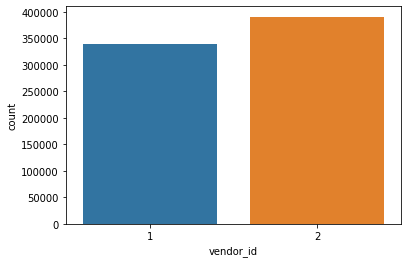

In [58]:
sns.countplot(data['vendor_id'])
plt.show()

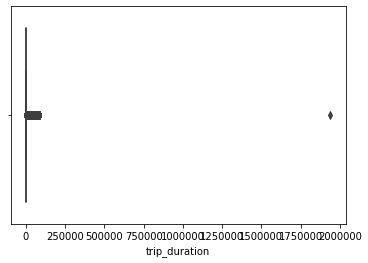

In [59]:
#checking Outlier in trip_duration data
sns.boxplot(data['trip_duration'], orient='horizontal')
plt.show()

In [60]:
# treating outlier data in trip_duration by striking of maimum trip_duration
data=data[data.trip_duration!=data.trip_duration.max()]

In [61]:
print( data['trip_duration'].nlargest(10))

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
673847    86369
163178    86367
179065    86365
248675    86364
680575    86363
Name: trip_duration, dtype: int64


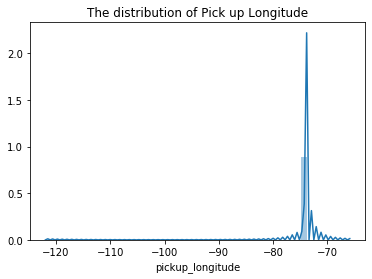

In [63]:
sns.distplot(data['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')
plt.show()

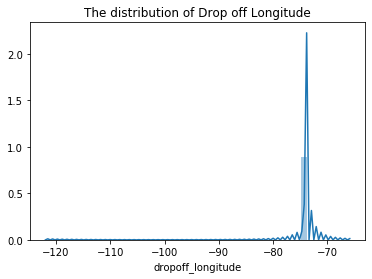

In [64]:
sns.distplot(data['dropoff_longitude'])
plt.title("The distribution of Drop off Longitude")
plt.show()

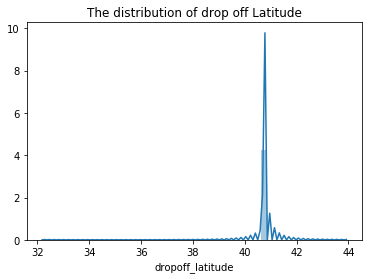

In [65]:
sns.distplot(data['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')
plt.show()

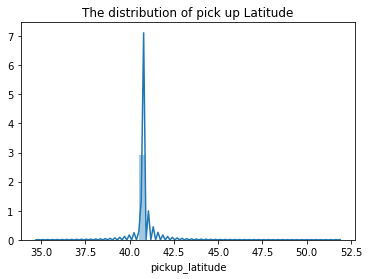

In [66]:
sns.distplot(data['pickup_latitude'])
plt.title('The distribution of pick up Latitude')
plt.show()

# Bivariate Analysis

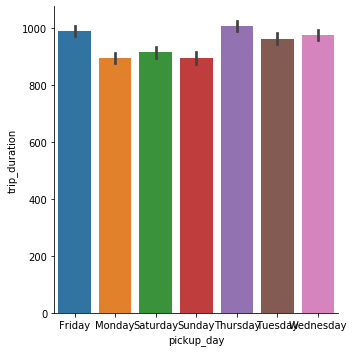

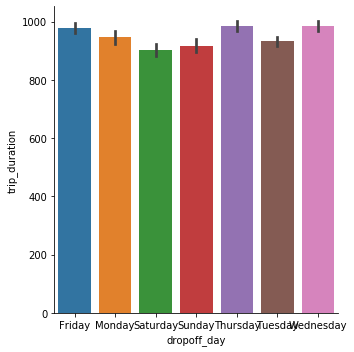

In [67]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=data)
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=data)
plt.show()

#### -> The time duraion of trip on thursday and wednesday is higher as compared to other day


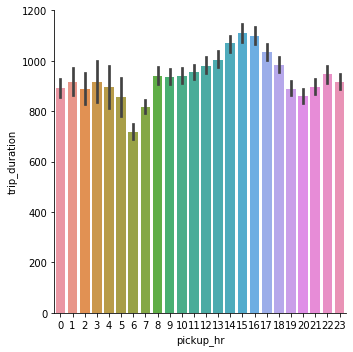

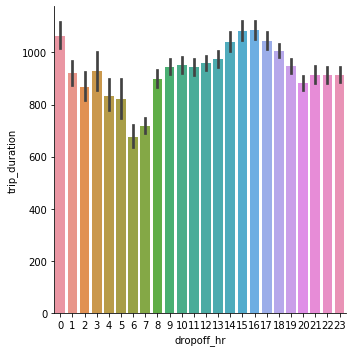

In [68]:
sns.catplot(x="pickup_hr", y="trip_duration",kind="bar",data=data)
sns.catplot(x="dropoff_hr", y="trip_duration",kind="bar",data=data)
plt.show()

#### -> The time duraion of trip  is higher between 1pm and 5pm as compared to other day

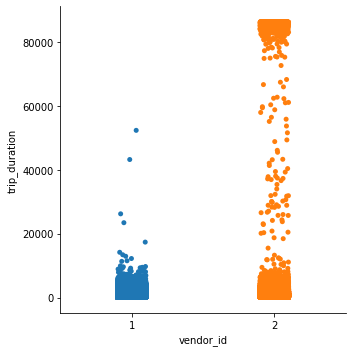

In [69]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=data)
plt.show()

#### -> Vendor 1 genrally takes short rides
#### -> Vendor 2 genrally takes all(short and long) rides

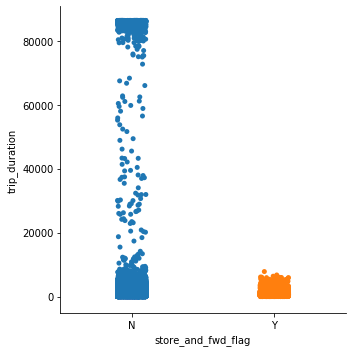

In [70]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=data)
plt.show()

#### For some of the shorter rides only store_and_fwd_flag service has been used otherwise long rides doesnt't use it

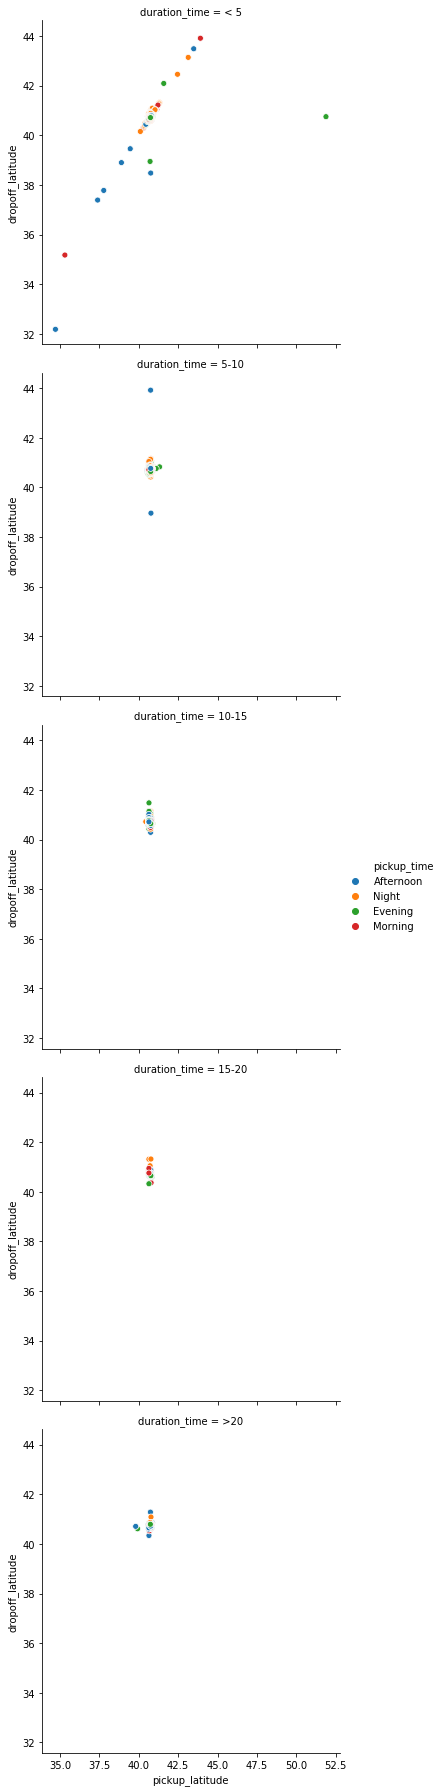

In [71]:
bins=np.array([0,1800,3600,5400,7200,90000])
data['duration_time']=pd.cut(data.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_time',row='duration_time',data=data);

#### For the long trips greater than 5 hrs the data for pickup latitude is concentrated between 40 and 42.5 degree and dropoff latitude is between 40 and 42 degree.

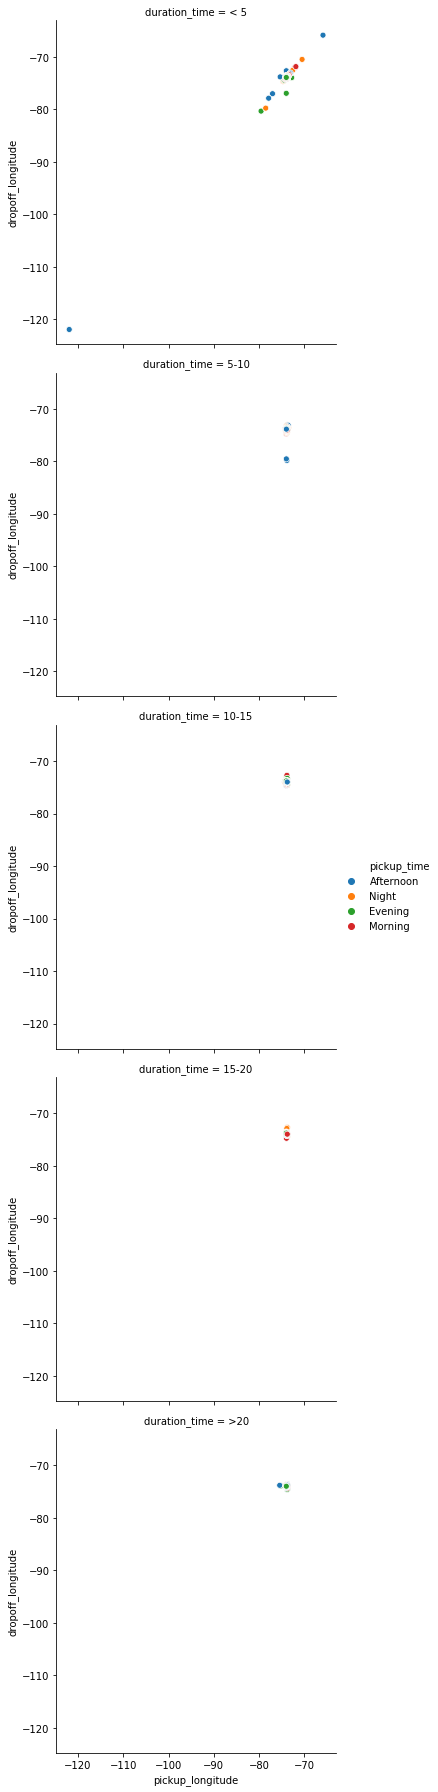

In [72]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_time',row='duration_time',data=data);

#### For shorter trips , the pickup and dropoff longitude is somewhat, evenly distributed between -80 degree and -65 degree with one outlier near -120 degree .

#### For longer trips the pickup and dropoff longitude is all concentrated near about -75 degree